**Overview**
> **`Ticker:`**
Mã chứng khoán đại diện cho một công ty trên thị trường chứng khoán.

> **`Date/Time:`**
Thời điểm diễn ra giao dịch, bao gồm ngày và giờ (giờ phút cụ thể).
Ví dụ: "12/25/2018 9:15" có nghĩa là giao dịch diễn ra vào lúc 9 giờ 15 phút ngày 25 tháng 12 năm 2018.

> **`Open:`**
Giá mở cửa trong khoảng thời gian được ghi nhận, tức là giá đầu tiên của cổ phiếu trong khung thời gian đó.
Ví dụ: Giá mở cửa tại 9:15 là 30.89.

> **`High:`**
Giá cao nhất của cổ phiếu trong khoảng thời gian được ghi nhận.
Ví dụ: Tại 9:16, giá cao nhất là 30.81.

> **`Low:`**
Giá thấp nhất của cổ phiếu trong khoảng thời gian được ghi nhận.
Ví dụ: Tại 9:21, giá thấp nhất là 30.59.

> **`Close`**:
Giá đóng cửa trong khoảng thời gian được ghi nhận, tức là giá cuối cùng của cổ phiếu trong khung thời gian đó.
Ví dụ: Giá đóng cửa tại 9:15 là 30.89.

> **`Volume:`**
Số lượng cổ phiếu được giao dịch trong khoảng thời gian đó.
Ví dụ: Tại 9:18, khối lượng giao dịch là 2120 cổ phiếu.

> **`Open Interest:`**
Số lượng hợp đồng phái sinh chưa được tất toán (dành cho giao dịch hợp đồng tương lai hoặc quyền chọn).
Trong trường hợp này, tất cả giá trị "Open Interest" đều bằng 0, có thể do dữ liệu bạn cung cấp chỉ liên quan đến cổ phiếu cơ bản chứ không phải các sản phẩm phái sinh.


### **`Load and check info dataset`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_vic = pd.read_csv('/content/drive/MyDrive/test/VIC.csv')
df_vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


In [4]:
df_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


In [5]:
df_vic.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


In [6]:
df_vic.isnull().sum()

,0
Ticker,0
Date/Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


In [7]:
df_vic.columns

Index(['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest'],
      dtype='object')

In [8]:
# df_vic['Date/Time'] = pd.to_datetime(df_vic['Date/Time'])
# df_vic = df_vic.drop(columns=['Open Interest'])
# df_vic.head()

### **`EDA and Features Enginerring`**

In [9]:
df_vic.index = pd.to_datetime(df_vic['Date/Time'], format='%m/%d/%Y %H:%M')

In [10]:

# # Tính khoảng cách thời gian giữa các dòng liên tiếp
# df_vic['Time_Diff'] = df_vic['Date/Time'].diff().dt.total_seconds() / 60  # chuyển sang phút

# # Kiểm tra các giá trị không bằng 1 phút
# non_continuous = df_vic[df_vic['Time_Diff'] != 1]

# # Hiển thị các dòng không liên tục và thông tin thống kê
# print("Số lượng khoảng thời gian không liên tục:", len(non_continuous))



In [11]:
df_vic.shape

(101266, 8)

In [12]:
# Tạo bản sao để merge
df_vic_shifted = df_vic[["Date/Time", "Close"]].copy()

num_minutes_to_shift = [1,3,5]

for minutes in num_minutes_to_shift:
  df_vic[f"Price After {minutes} minutes"] = pd.merge_asof(
      df_vic, df_vic_shifted,
      left_on=df_vic.index + pd.Timedelta(minutes=minutes),  # Use index + n minutes
      right_index=True,
      direction="backward"
  )["Close_y"]
  df_vic[f"Price Fluctuations {minutes} minutes"] = df_vic[f"Price After {minutes} minutes"] - df_vic["Close"]

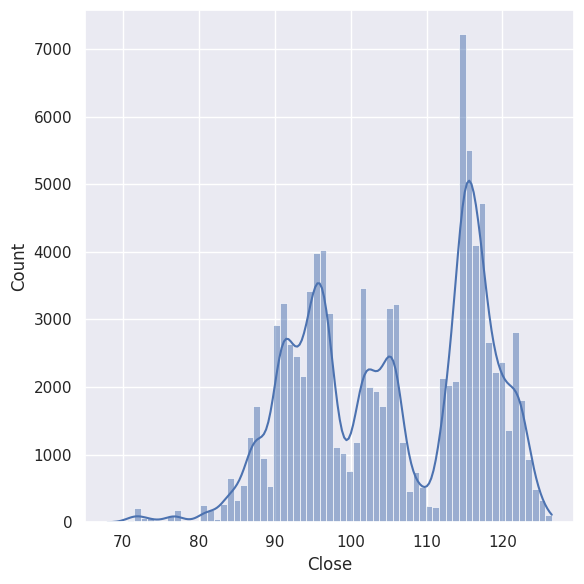

In [13]:
fig, ax = plt.subplots( figsize=(6, 6))

# Plotting each histogram on respective axes
sns.histplot(data=df_vic, x='Close', kde=True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


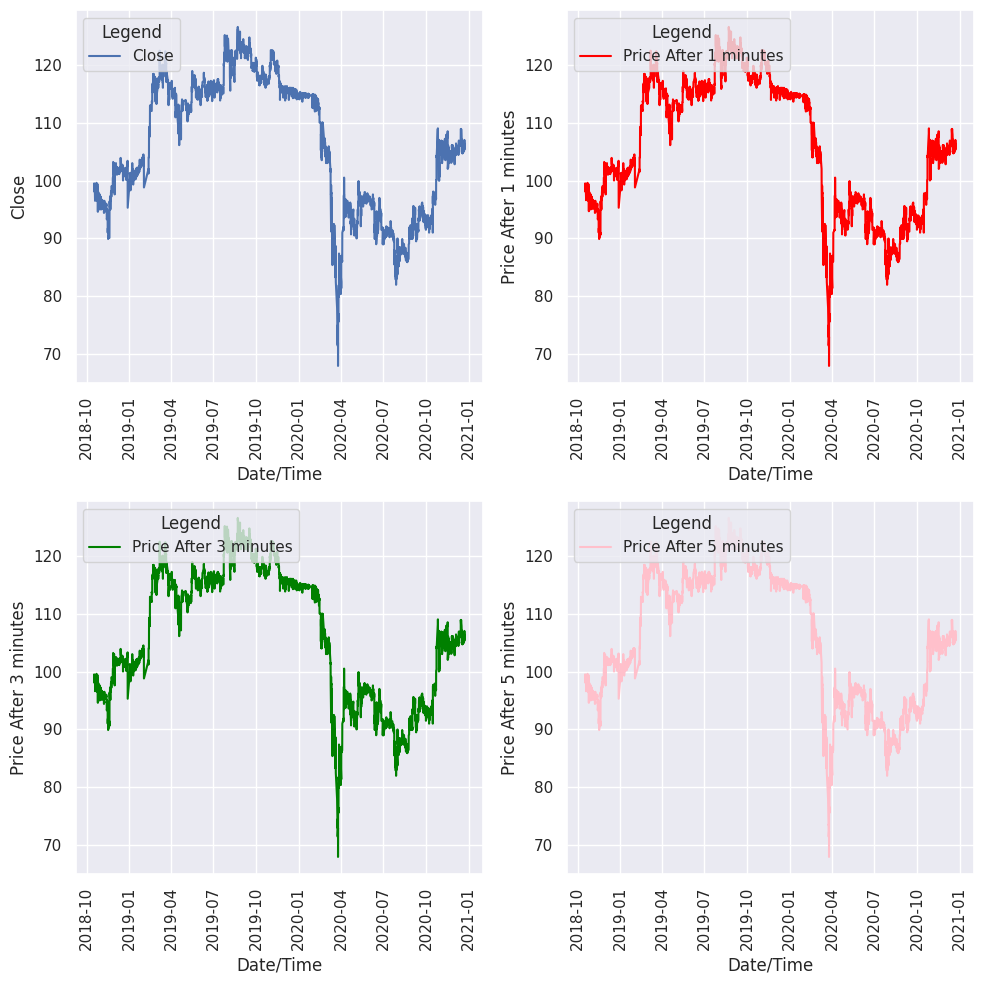

In [14]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

# Vẽ biểu đồ đường với độ trong suốt alpha
sns.lineplot(data=df_vic, x=df_vic.index, y='Close', label='Close', alpha=1, ax=ax[0,0])
sns.lineplot(data=df_vic, x=df_vic.index, y='Price After 1 minutes', label='Price After 1 minutes',color='red', ax=ax[0,1])
sns.lineplot(data=df_vic, x=df_vic.index, y='Price After 3 minutes', label='Price After 3 minutes',color='green', ax=ax[1,0])
sns.lineplot(data=df_vic, x=df_vic.index, y='Price After 5 minutes', label='Price After 5 minutes',color='pink', ax=ax[1,1])


# Hiển thị chú thích (legend) cho từng axes
ax[0, 0].legend(title='Legend', loc='upper left')
ax[0, 1].legend(title='Legend', loc='upper left')
ax[1, 0].legend(title='Legend', loc='upper left')
ax[1, 1].legend(title='Legend', loc='upper left')
for ax_i in ax.flatten():  # Lặp qua tất cả các axes trong mảng 2x2
    ax_i.tick_params(axis='x', rotation=90)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [15]:
df_vic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101266 entries, 2018-10-17 09:39:00 to 2020-12-22 14:46:00
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Ticker                        101266 non-null  object 
 1   Date/Time                     101266 non-null  object 
 2   Open                          101266 non-null  float64
 3   High                          101266 non-null  float64
 4   Low                           101266 non-null  float64
 5   Close                         101266 non-null  float64
 6   Volume                        101266 non-null  int64  
 7   Open Interest                 101266 non-null  int64  
 8   Price After 1 minutes         101266 non-null  float64
 9   Price Fluctuations 1 minutes  101266 non-null  float64
 10  Price After 3 minutes         101266 non-null  float64
 11  Price Fluctuations 3 minutes  101266 non-null  float64
 12  Price Afte

### **`Preprocessing and model training`**

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Chọn các cột cần thiết
features = ['Close']
target = ['Price After 1 minutes','Price After 3 minutes','Price After 5 minutes']

df_new = df_vic[features + target]

# Chia dữ liệu thành train, validation, test
train_size = int(len(df_new) * 0.7)
valid_size = int(len(df_new) * 0.15)

df_new_train = df_new.iloc[:train_size]
df_new_valid = df_new.iloc[train_size:train_size + valid_size]
df_new_test = df_new.iloc[train_size + valid_size:]


In [17]:
df_new_train.shape

(70886, 4)

In [18]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler
scaler = StandardScaler()

# Áp dụng scaler cho các features của tập train
scaler_features = scaler.fit(df_new_train[features])  # Chỉ fit trên tập train


train_scaled = scaler_features.transform(df_new_train[features])
valid_scaled = scaler_features.transform(df_new_valid[features])
test_scaled = scaler_features.transform(df_new_test[features])

y_train1 = df_new_train[target].values
y_valid1 = df_new_valid[target].values
y_test1 = df_new_test[target].values

In [19]:
print(y_train1.shape)
print(df_new_train[target].shape)
print(train_scaled.shape)

(70886, 3)
(70886, 3)
(70886, 1)


In [20]:

# Tạo chuỗi thời gian
def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(len(data)) :
        X.append(data[i:i + time_steps, :])
        y.append(target[i])
    return np.array(X), np.array(y)

time_steps = 1
X_train, y_train = create_sequences(train_scaled, y_train1, time_steps)
X_valid, y_valid = create_sequences(valid_scaled, y_valid1, time_steps)
X_test, y_test = create_sequences(test_scaled, y_test1, time_steps)

# Kiểm tra kích thước đầu ra
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)

X_train shape: (70886, 1, 1)
X_valid shape: (15189, 1, 1)
X_test shape: (15191, 1, 1)


In [21]:
y_train

array([[98.5, 98.6, 98.7],
       [98.6, 98.7, 98.8],
       [98.6, 98.7, 98.8],
       ...,
       [96.9, 97.3, 97.5],
       [97.3, 97.5, 97.5],
       [97.3, 97.5, 97.5]])

In [22]:
X_train.shape[2]

1

#### LSTM

In [23]:

# Xây dựng mô hình LSTM tối ưu hơn
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(3, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Huấn luyện mô hình
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,891 (116.76 KB)

 Trainable params: 29,891 (116.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 3536.7349 - mae: 41.7755 - val_loss: 2.1005 - val_mae: 1.3787
Epoch 2/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 148.8960 - mae: 9.7331 - val_loss: 4.7874 - val_mae: 2.1602
Epoch 3/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 125.3769 - mae: 8.8943 - val_loss: 0.4738 - val_mae: 0.6314
Epoch 4/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 81.2250 - mae: 7.0905 - val_loss: 0.1927 - val_mae: 0.3490
Epoch 5/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 33.5881 - mae: 4.4872 - val_loss: 0.1221 - val_mae: 0.2748
Epoch 6/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 8.2484 - mae: 2.1363 - val_loss: 0.4257 - val_mae: 0.5992
Epoch 7/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2.7646 - mae: 1.2068 - val_loss: 0.2452 - val_mae: 0.4534
Epoch 8/10
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 1.7017 - mae: 0.9277 - val_loss: 0.1157 - val_mae: 0.2889
Epoch 9/10
2216/2216 ━

### **`Validation`**

#### LSTM

##### Trên tập valid

In [24]:
# Đánh giá mô hình
loss, mae = model.evaluate(X_valid, y_valid)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Dự đoán trên tập test
y_pred = model.predict(X_valid)

475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0881 - mae: 0.2563
Test Loss: 0.09592016786336899
Test MAE: 0.2590443193912506
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_valid[:, 0], y_pred[:, 0])
r2_3min = r2_score(y_valid[:, 1], y_pred[:, 1])
r2_5min = r2_score(y_valid[:, 2], y_pred[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

R2 score for 1 minute prediction: 0.9946833082642319
R2 score for 3 minute prediction: 0.992780222025558
R2 score for 5 minute prediction: 0.9906974725421995


In [26]:
y_valid

array([[97.5, 97.5, 97.6],
       [97.5, 97.5, 97.6],
       [97.5, 97.6, 97.6],
       ...,
       [94.1, 94.3, 94.3],
       [94.2, 94.3, 94.3],
       [94.3, 94.3, 94.3]])

In [27]:
y_pred

array([[97.47023 , 97.50906 , 97.540565],
       [97.66235 , 97.70155 , 97.73291 ],
       [97.66235 , 97.70155 , 97.73291 ],
       ...,
       [94.53815 , 94.57068 , 94.60397 ],
       [94.33998 , 94.37205 , 94.40543 ],
       [94.43909 , 94.4714  , 94.50474 ]], dtype=float32)

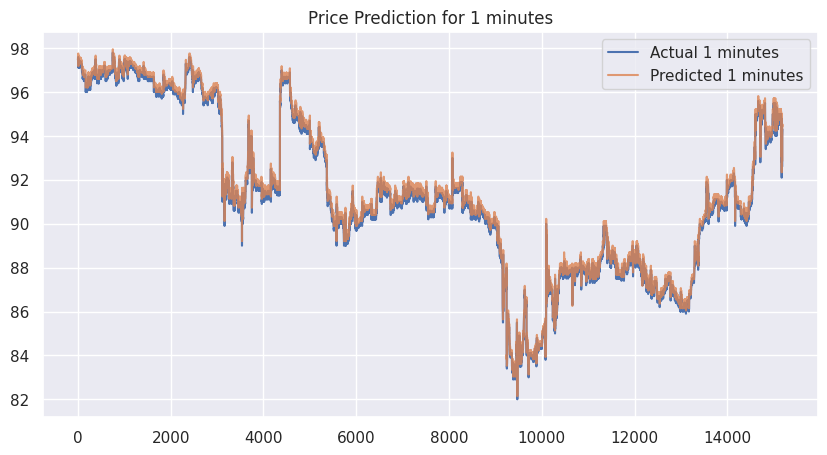

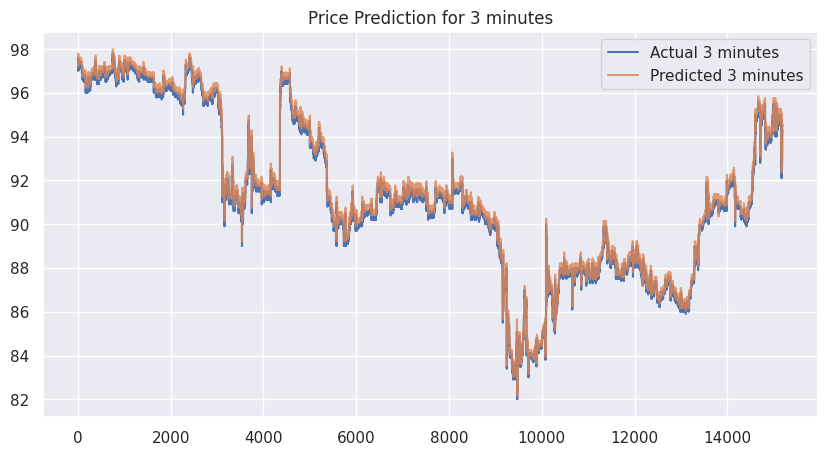

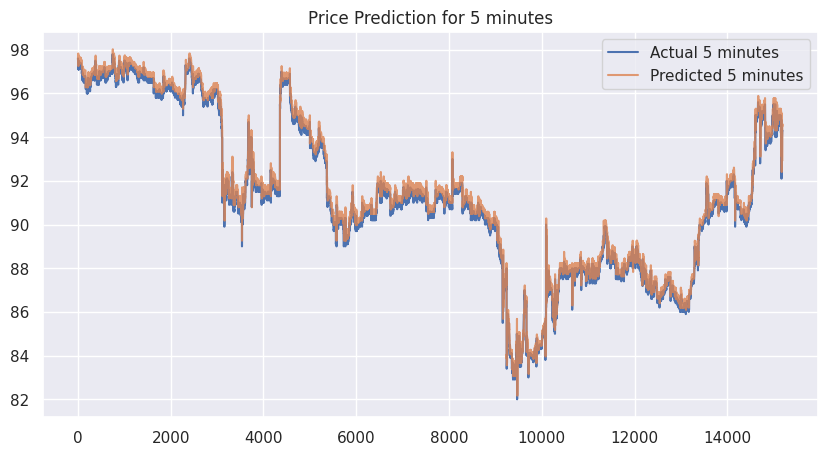

In [28]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_valid[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred[:, i], label=f"Predicted {minutes} minutes",alpha = 0.8)
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()


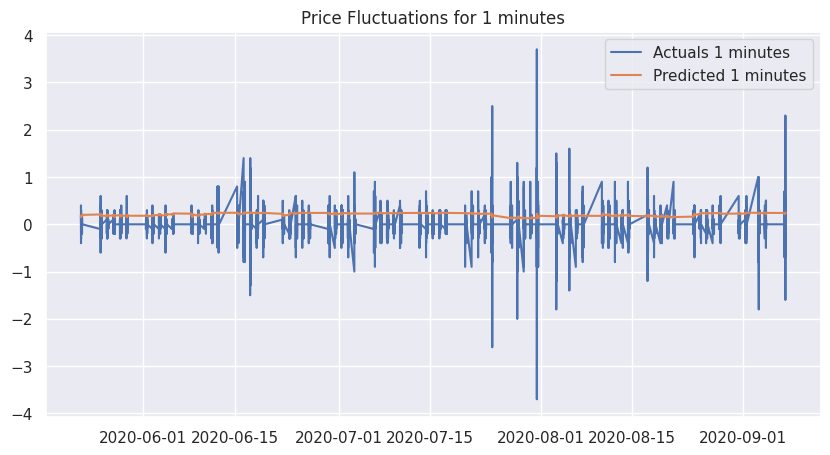

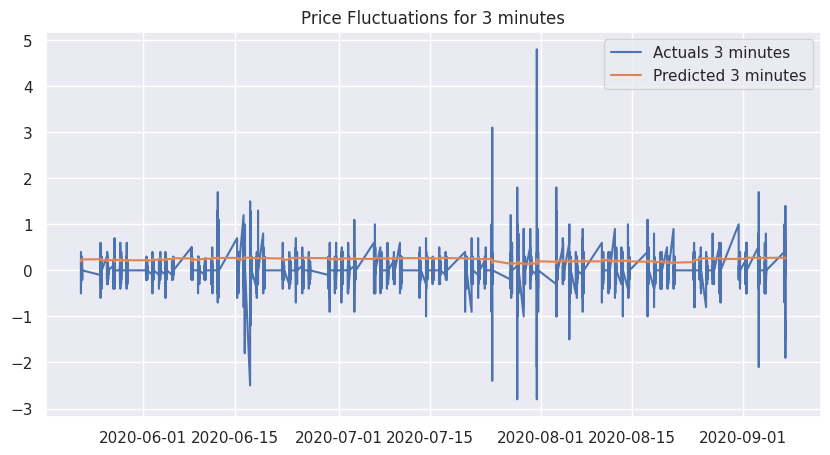

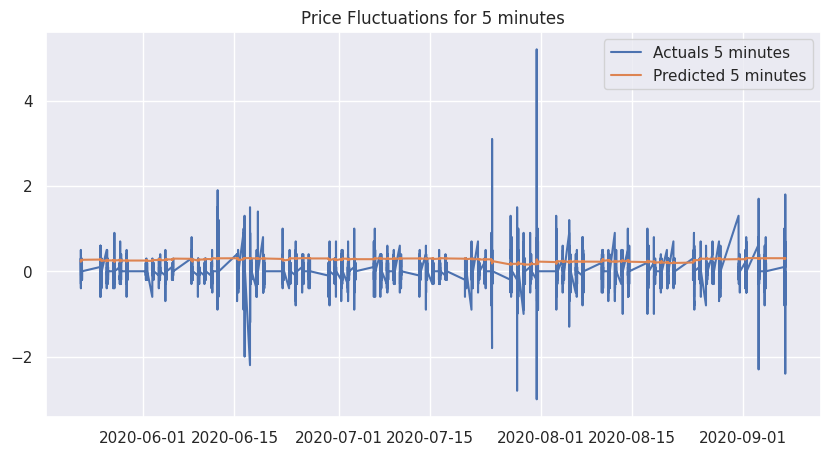

In [29]:
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(df_vic[f"Price Fluctuations {minutes} minutes"].iloc[train_size:train_size+valid_size] , label=f"Actuals {minutes} minutes")
    plt.plot(y_pred[:,i] - df_vic['Close'].iloc[train_size:train_size+valid_size]  , label=f"Predicted {minutes} minutes")
    plt.legend()
    plt.title(f"Price Fluctuations for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  3312
- Dự đoán sai xu hướng:  11877


<Figure size 1000x500 with 0 Axes>

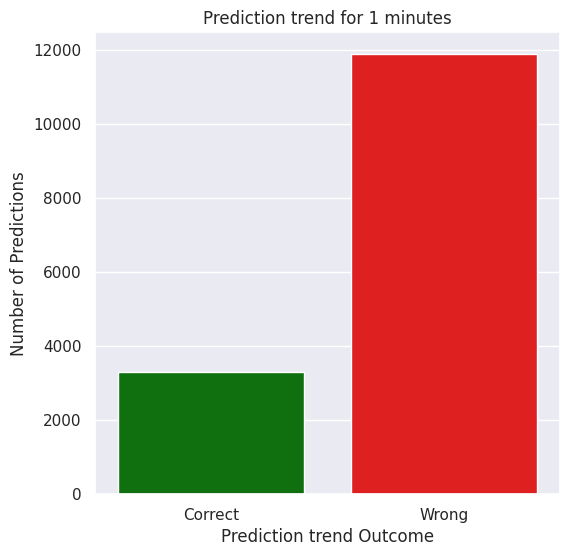

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  4422
- Dự đoán sai xu hướng:  10767


<Figure size 1000x500 with 0 Axes>

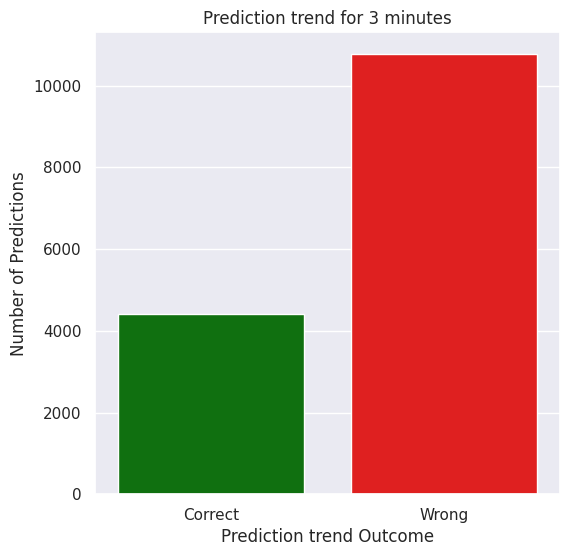

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  4986
- Dự đoán sai xu hướng:  10203


<Figure size 1000x500 with 0 Axes>

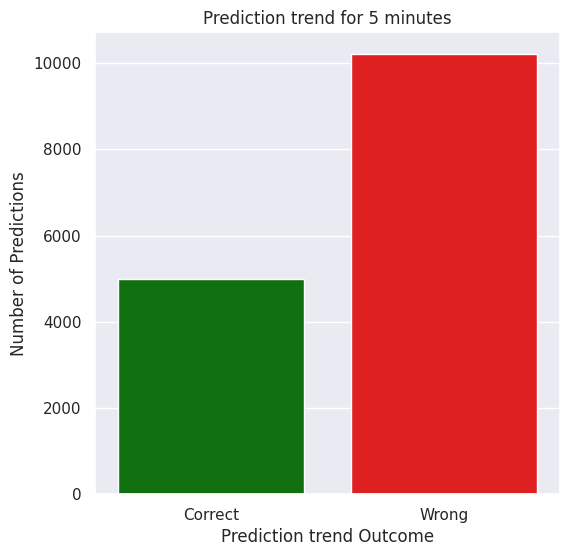

------------------------------


In [30]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred[:,i] - df_vic['Close'].iloc[train_size:train_size+valid_size]
  t1 = df_vic[f"Price Fluctuations {minutes} minutes"].iloc[train_size:train_size+valid_size]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)


##### Trên tập Test

In [31]:
# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_test[:, 0], y_pred[:, 0])
r2_3min = r2_score(y_test[:, 1], y_pred[:, 1])
r2_5min = r2_score(y_test[:, 2], y_pred[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1669 - mae: 0.3409
Test Loss: 0.2238583117723465
Test MAE: 0.41075366735458374
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R2 score for 1 minute prediction: 0.9936705338812241
R2 score for 3 minute prediction: 0.9934873565135945
R2 score for 5 minute prediction: 0.9928021691960404


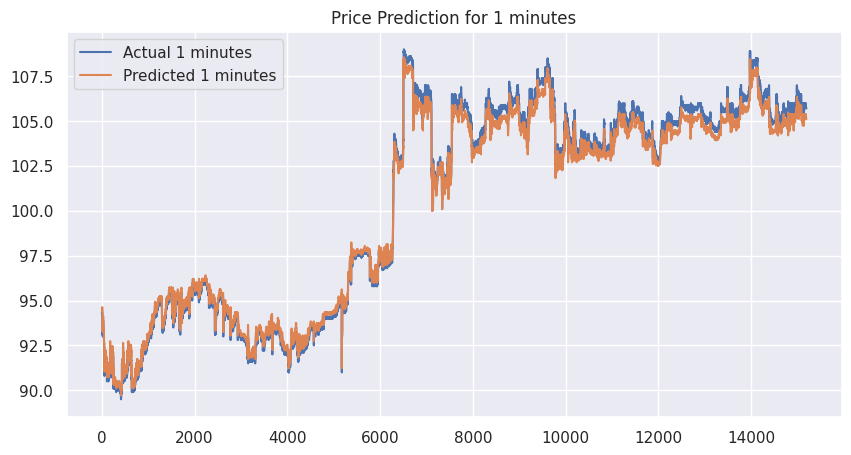

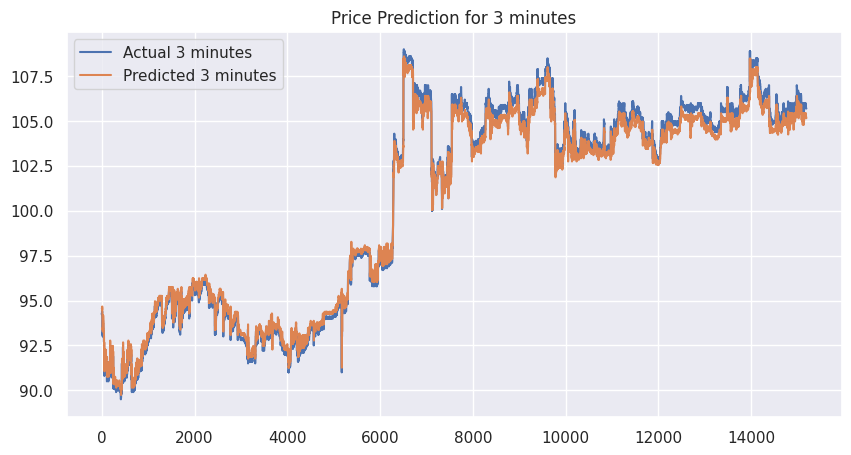

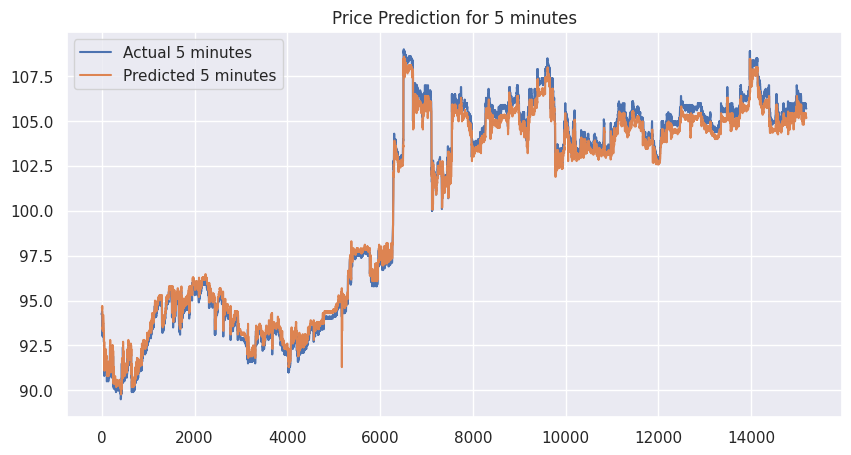

In [32]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred[:, i], label=f"Predicted {minutes} minutes")
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()


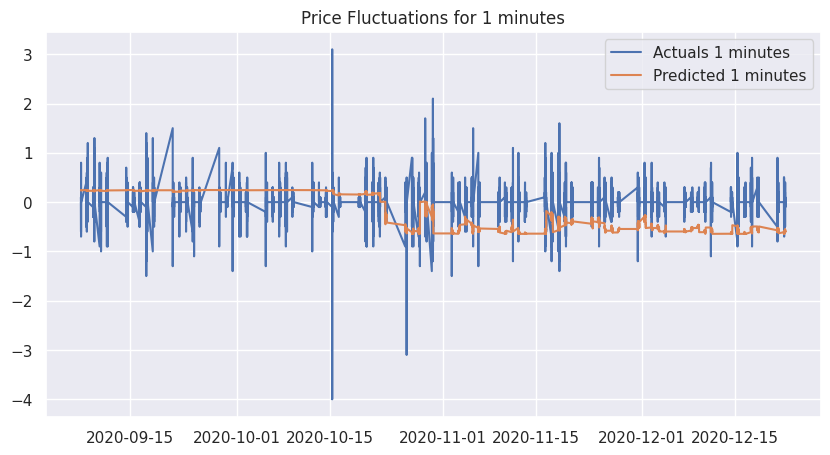

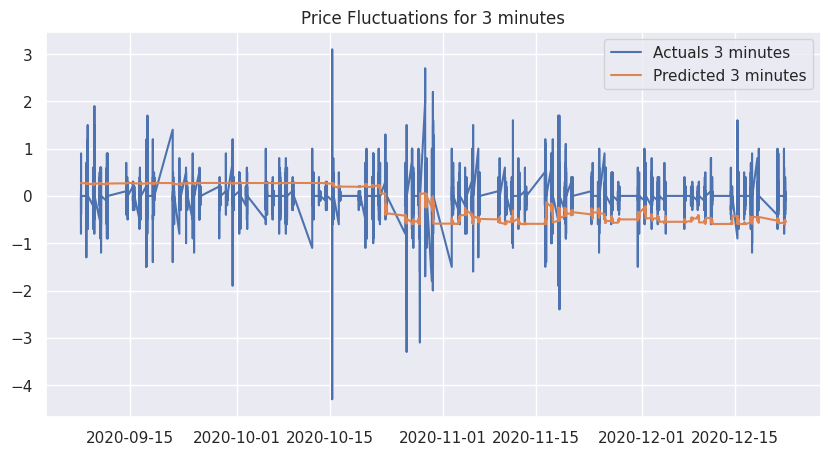

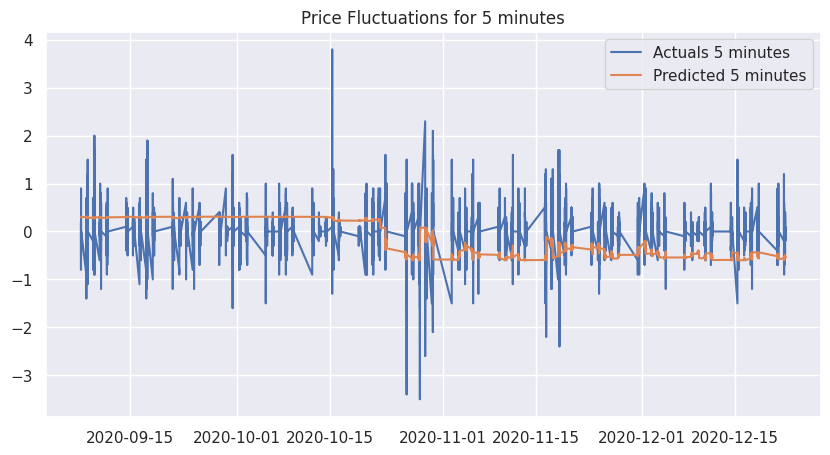

In [33]:
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(df_vic[f"Price Fluctuations {minutes} minutes"].iloc[train_size+valid_size:] , label=f"Actuals {minutes} minutes")
    plt.plot(y_pred[:,i] - df_vic['Close'].iloc[train_size+valid_size:]  , label=f"Predicted {minutes} minutes")
    plt.legend()
    plt.title(f"Price Fluctuations for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  3391
- Dự đoán sai xu hướng:  11800


<Figure size 1000x500 with 0 Axes>

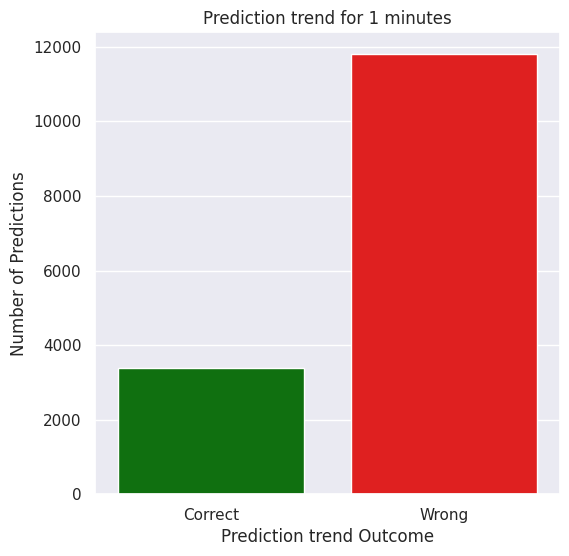

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  4734
- Dự đoán sai xu hướng:  10457


<Figure size 1000x500 with 0 Axes>

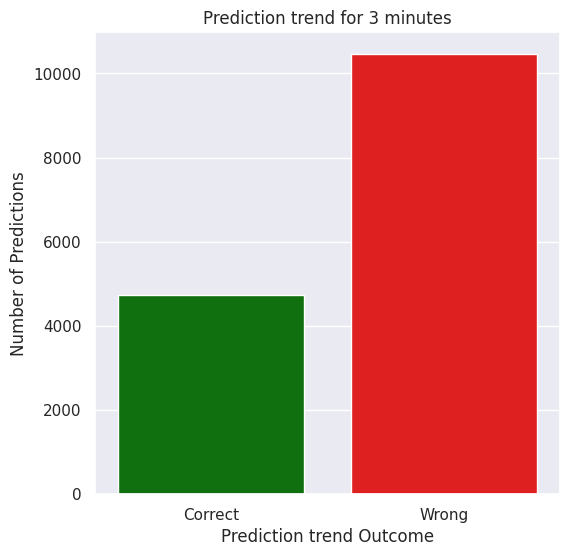

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  5315
- Dự đoán sai xu hướng:  9876


<Figure size 1000x500 with 0 Axes>

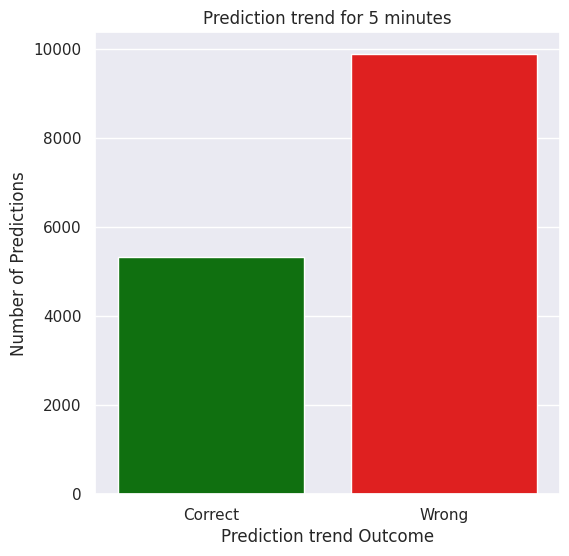

------------------------------


In [34]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred[:,i] - df_vic['Close'].iloc[train_size+valid_size:]
  t1 = df_vic[f"Price Fluctuations {minutes} minutes"].iloc[train_size+valid_size:]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)


#### XGB

**X_train.reshape(X_train.shape[0], -1):**
> **Mục đích:**
* Chuyển đổi mảng X_train từ 3 chiều sang 2 chiều để tương thích với XGBoost.
* "Làm phẳng" dữ liệu, kết hợp các chiều đặc trưng và chuỗi thời gian thành một vectơ đặc trưng duy nhất cho mỗi mẫu.

> **Cách hoạt động:**
* Giữ nguyên số lượng mẫu (chiều thứ nhất).
* Tự động tính toán chiều thứ hai để chứa tất cả các phần tử còn lại.
* Kết quả là một mảng 2 chiều với mỗi hàng đại diện cho một mẫu và mỗi cột đại diện cho một đặc trưng.

##### Tập valid

In [35]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
# Khởi tạo mô hình XGBRegressor
base_model = XGBRegressor(objective='reg:squarederror',  # Sử dụng 'reg:linear' cho hồi quy
                         eval_metric='mae',
                         eta=0.1,
                         max_depth=3,
                         subsample=0.8,
                         colsample_bytree=0.8)

# Sử dụng MultiOutputRegressor để huấn luyện cho nhiều đầu ra
model_xgb = MultiOutputRegressor(base_model)

# Huấn luyện mô hình
model_xgb.fit(X_train.reshape(X_train.shape[0], -1), y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.1,
                                            eval_metric='mae',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [36]:
# Dự đoán trên tập kiểm định
y_pred_xgb = model_xgb.predict(X_valid.reshape(X_valid.shape[0], -1))

# Đánh giá mô hình bằng MSE
mse_xgb = mean_squared_error(y_valid, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")



XGBoost MSE: 0.08837580730460683


In [37]:
from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_valid[:, 0], y_pred_xgb[:, 0])
r2_3min = r2_score(y_valid[:, 1], y_pred_xgb[:, 1])
r2_5min = r2_score(y_valid[:, 2], y_pred_xgb[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

R2 score for 1 minute prediction: 0.9943532114644292
R2 score for 3 minute prediction: 0.9932881020693322
R2 score for 5 minute prediction: 0.9922385966875532


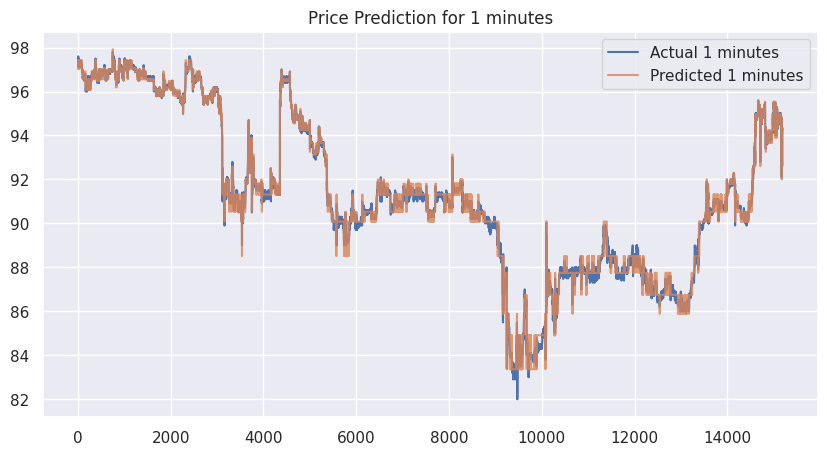

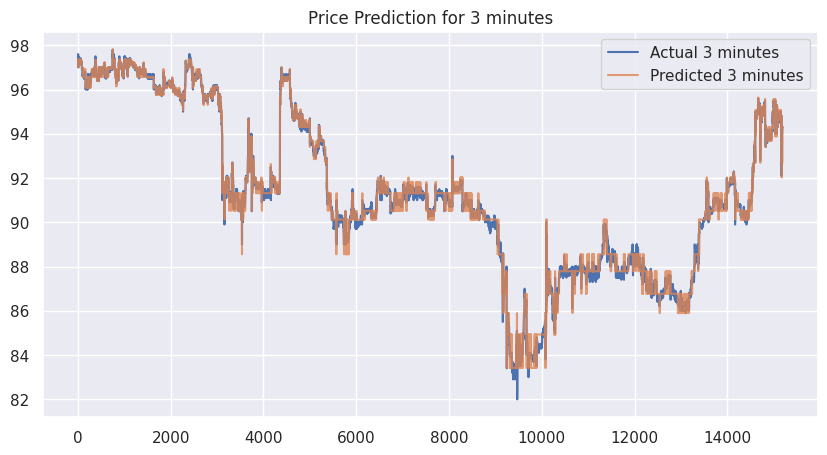

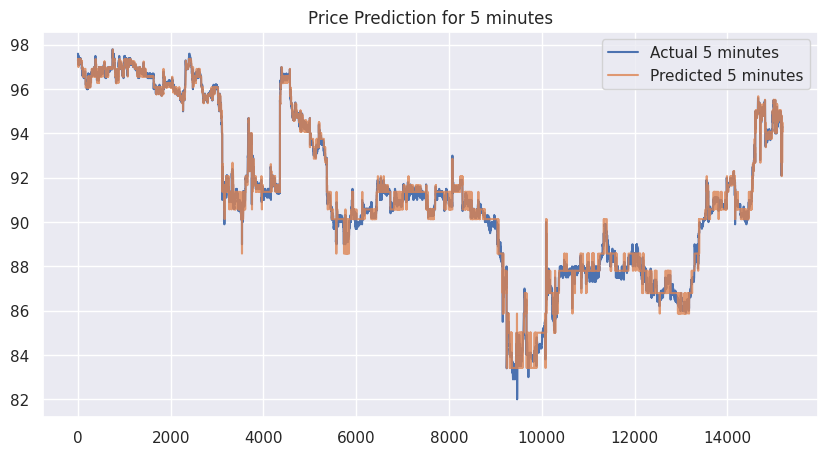

In [38]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_valid[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred_xgb[:, i], label=f"Predicted {minutes} minutes",alpha = 0.8)
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  3298
- Dự đoán sai xu hướng:  11891


<Figure size 1000x500 with 0 Axes>

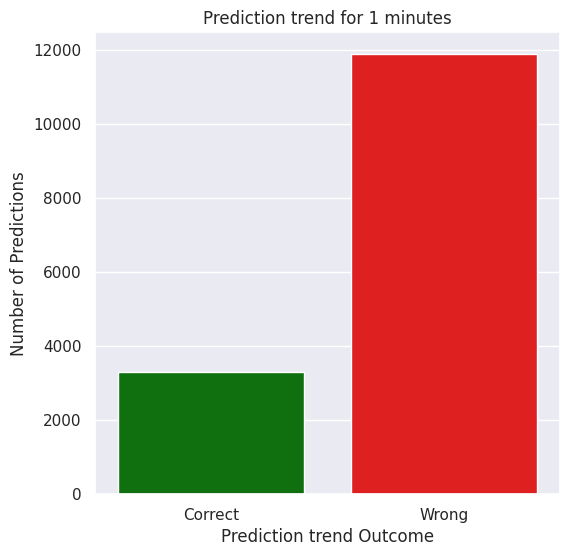

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  4511
- Dự đoán sai xu hướng:  10678


<Figure size 1000x500 with 0 Axes>

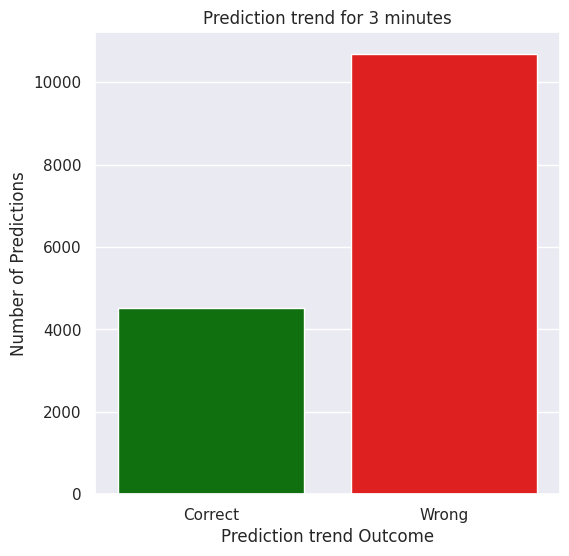

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  5043
- Dự đoán sai xu hướng:  10146


<Figure size 1000x500 with 0 Axes>

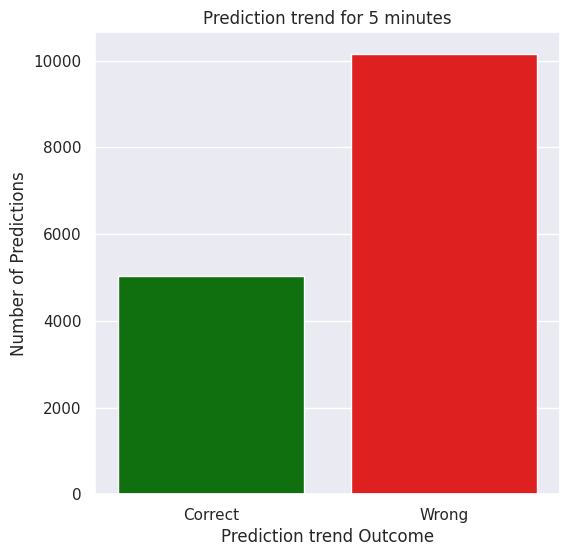

------------------------------


In [39]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred_xgb[:,i] - df_vic['Close'].iloc[train_size:train_size+valid_size]
  t1 = df_vic[f"Price Fluctuations {minutes} minutes"].iloc[train_size:train_size+valid_size]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)

##### Tập test

In [40]:
# Dự đoán trên tập kiểm định
y_pred_xgb_test = model_xgb.predict(X_test.reshape(X_test.shape[0], -1))

# Đánh giá mô hình bằng MSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb_test)
print(f"XGBoost MSE: {mse_xgb}")

XGBoost MSE: 0.08368689782835949


In [41]:
from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_test[:, 0], y_pred_xgb_test[:, 0])
r2_3min = r2_score(y_test[:, 1], y_pred_xgb_test[:, 1])
r2_5min = r2_score(y_test[:, 2], y_pred_xgb_test[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

R2 score for 1 minute prediction: 0.9983449443305097
R2 score for 3 minute prediction: 0.9974273966873225
R2 score for 5 minute prediction: 0.9967349952961941


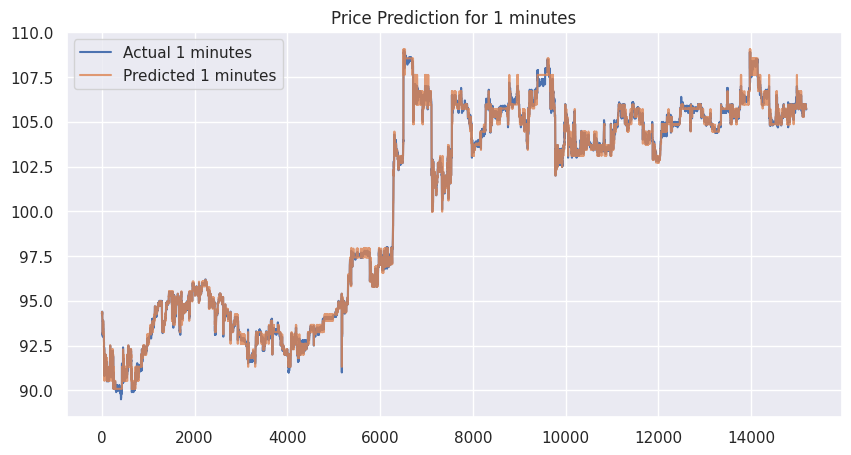

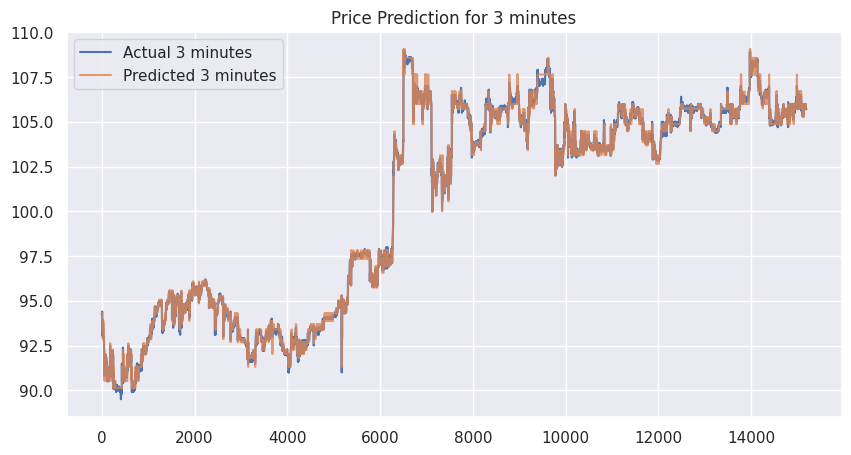

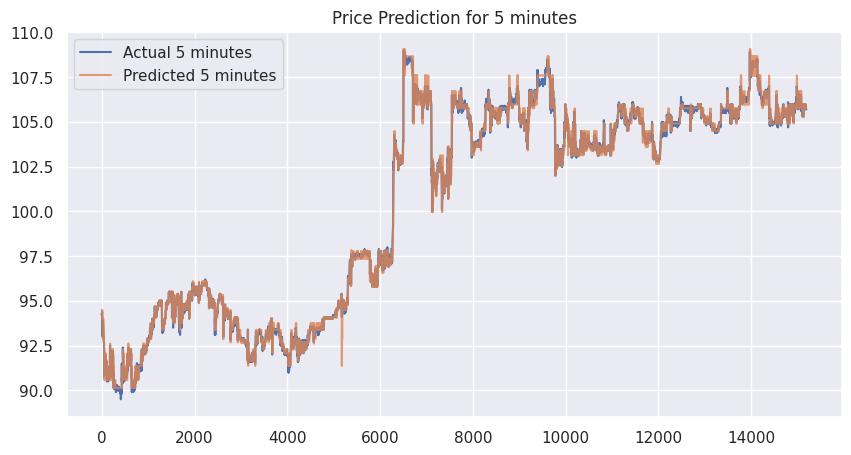

In [42]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred_xgb_test[:, i], label=f"Predicted {minutes} minutes",alpha = 0.8)
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  3372
- Dự đoán sai xu hướng:  11819


<Figure size 1000x500 with 0 Axes>

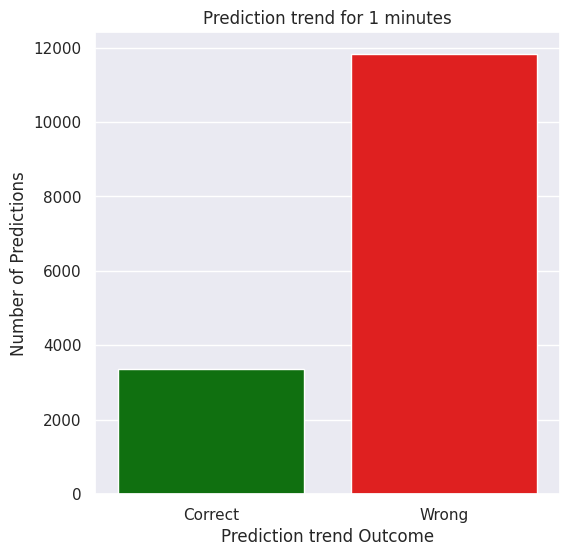

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  4673
- Dự đoán sai xu hướng:  10518


<Figure size 1000x500 with 0 Axes>

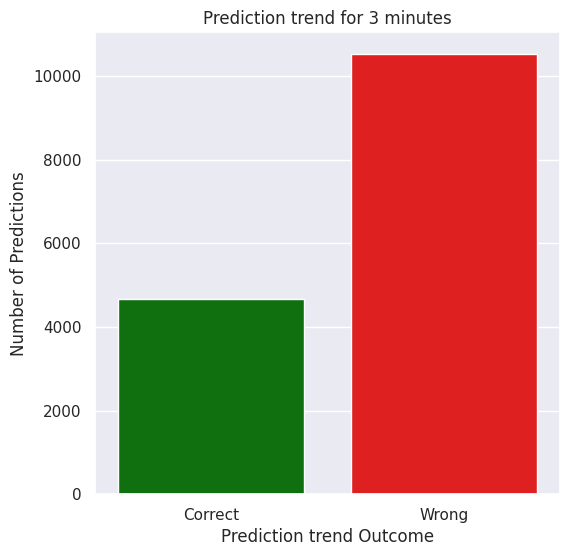

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  5410
- Dự đoán sai xu hướng:  9781


<Figure size 1000x500 with 0 Axes>

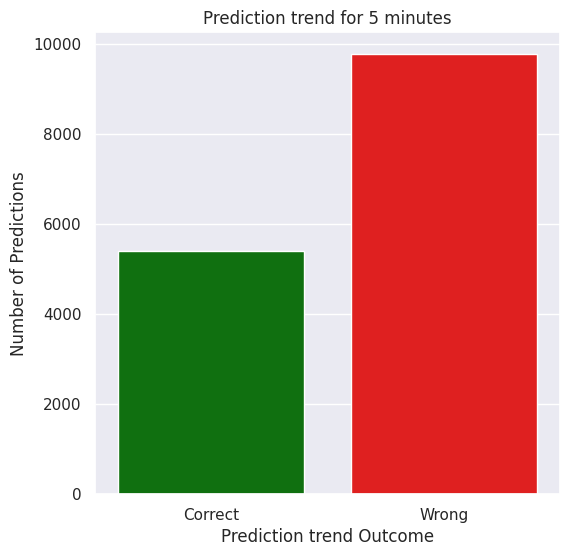

------------------------------


In [43]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred_xgb_test[:,i] - df_vic['Close'].iloc[train_size+valid_size:]
  t1 = df_vic[f"Price Fluctuations {minutes} minutes"].iloc[train_size+valid_size:]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)


## Summary

Cả 2 mô hình đều đưa ra dự đoán khá tốt theo thời gian trên cả tập `valid` và tập `test`
